# Classification Neural Network

In [24]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [25]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [27]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3698 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3482 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3405 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3332 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3263 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3199 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3137 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3083 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3031 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2789 - accuracy: 0.4740
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing binary classification


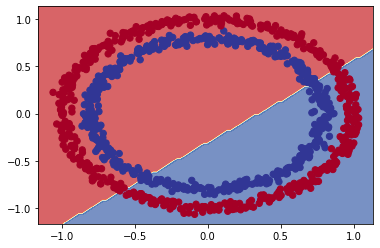

In [28]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [29]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 3.6737 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6658 - accuracy: 0.4470
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4136 - accuracy: 0.4420
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3529 - accuracy: 0.4400
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3024 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2569 - accuracy: 0.4340
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2168 - accuracy: 0.4270
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1810 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1386 - accuracy: 0.3980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0923 - accuracy: 0.3970
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing binary classification


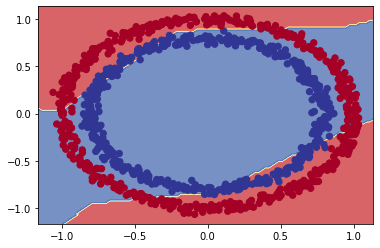

In [30]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [31]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5080
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5060
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5080
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


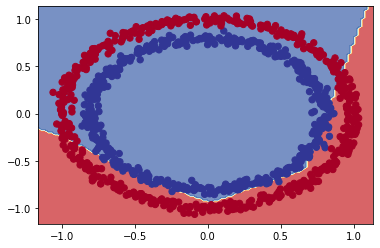

In [32]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [33]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

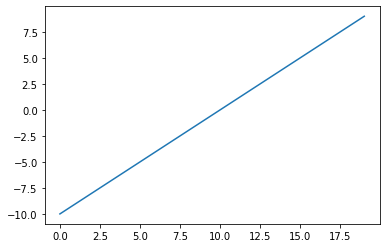

In [34]:
plt.plot(A)

In [35]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

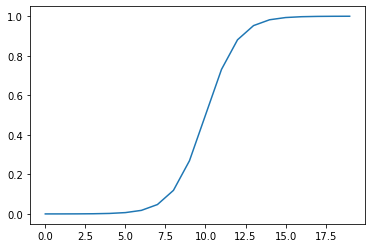

In [36]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))

In [37]:
# Replicating relu function
def relu(x):
    return tf.maximum(0, x)

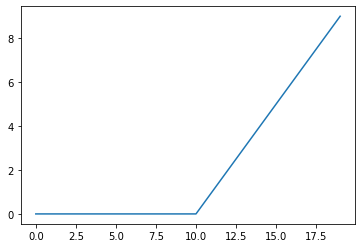

In [38]:
# Aply relu function to mock tensor and plot it
plt.plot(relu(A))

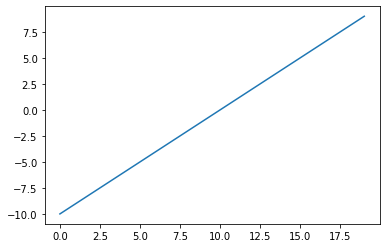

In [39]:
# Checking linear function
plt.plot(tf.keras.activations.linear(A))

In [40]:
# Does linear activation changes anything in tendor? No!
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Splitting dataset into training and testing parts

In [41]:
len(X)

1000

In [42]:
# 80/20 split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Create a model
model_nl4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history4 = model_nl4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.4750
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5487
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5375
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5475
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.5412
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.6025
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.5688
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


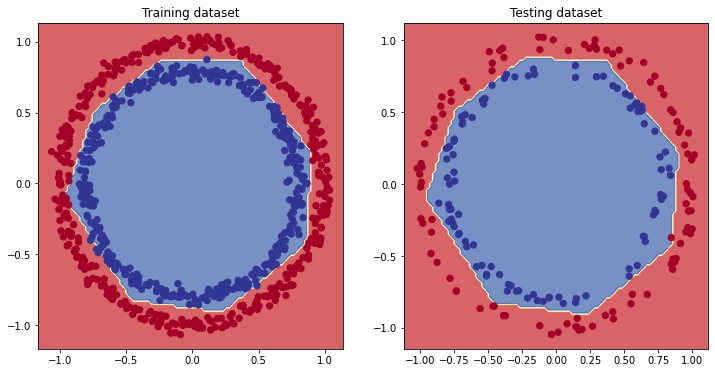

In [44]:
# Plot the decision boundaries for training and testing datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model=model_nl4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_nl4, X_test, y_test)

## Plotting the loss curve

In [45]:
history4.history

{'loss': [0.695030927658081,
  0.6911672353744507,
  0.6881135702133179,
  0.6848074197769165,
  0.6804291605949402,
  0.6772412061691284,
  0.6723430752754211,
  0.6678867340087891,
  0.6657669544219971,
  0.662074863910675,
  0.6553182005882263,
  0.6487919688224792,
  0.6422780752182007,
  0.6327062249183655,
  0.6117352247238159,
  0.5896701216697693,
  0.5647233128547668,
  0.5229048728942871,
  0.49180230498313904,
  0.46918871998786926,
  0.4384830594062805,
  0.33052119612693787,
  0.269035279750824,
  0.225127175450325,
  0.1806170493364334],
 'accuracy': [0.4749999940395355,
  0.5,
  0.5537499785423279,
  0.5487499833106995,
  0.5375000238418579,
  0.59375,
  0.5475000143051147,
  0.5412499904632568,
  0.6025000214576721,
  0.5687500238418579,
  0.6025000214576721,
  0.5912500023841858,
  0.5962499976158142,
  0.6025000214576721,
  0.6650000214576721,
  0.6974999904632568,
  0.7250000238418579,
  0.7475000023841858,
  0.7712500095367432,
  0.7962499856948853,
  0.814999997615

In [47]:
import pandas as pd

loss_pd4 = pd.DataFrame(history4.history)
loss_pd4

,loss,accuracy
0,0.695031,0.47500
1,0.691167,0.50000
2,0.688114,0.55375
3,0.684807,0.54875
4,0.680429,0.53750
5,0.677241,0.59375
6,0.672343,0.54750
7,0.667887,0.54125
8,0.665767,0.60250
9,0.662075,0.56875
